In [170]:
import pandas as pd
import os
from math import cos, asin, sqrt, pi
import datetime
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# Part 1: Data Processing

In [ ]:
TAXI_URL = "https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page"
# get HTML from main page
content = requests.get(TAXI_URL)
soup = bs4.BeautifulSoup(content.text, 'html.parser')

In [ ]:
# find all links on the main page
pattern = r"yellow_tripdata_20(0[0-9]|1[0-5])\-\d{2}.csv$"
links = [a['href'] for a in soup.find_all('a')]x

In [ ]:
# use regex to get only the yellow taxi links from 2009 - june 2015
new_list = []

for link in links:
    if re.search(pattern, link) is not None:
        mo_1 = link[-6]
        mo_2 = link[-5]
        if mo_1 == "1":
            new_list.append(link)
        elif int(mo_2) <= 6:
            new_list.append(link)

In [ ]:
# write csvs to files
i = 0

for link in new_list:
    print(i)
    i += 1
    req = requests.get(link)
    url_content = req.content
    
    csv_file = open('downloaded.csv', 'ab')
    csv_file.write(url_content)
    csv_file.close()

In [ ]:
# convert csv to df
import pandas as pd
entire_df = pd.read_csv("downloaded.csv")

**ADD CODE TO SAMPLE DATA**

In [137]:
# Load the sampled data
df = pd.read_csv('sampled.csv')

/Users/scottqin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,12,20,21,27,30,35,36,42,45,53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [138]:
# We will clean the sampled data year by year. There are columns with different names showing the same types of data.
# We need to merge these columns together and delete the irrelevant columns
# From the given sample table we know there are 8 useful columns.

In [139]:
pd.set_option('display.max_columns', None)

In [140]:
# create a new datafram called cleaned
cleaned = pd.DataFrame()
# create new columns
pickup_datetime = []
fare_amount = []
pickup_longitude = []
pickup_latitude = []
dropoff_longitude = []
dropoff_latitude = []
passenger_count = []

In [141]:
# clean the data from 2009
temp = df.iloc[0:14400]
pickup_datetime += list(temp['Trip_Pickup_DateTime'])
fare_amount += list(temp['Fare_Amt'])
pickup_longitude += list(temp['Start_Lon'])
pickup_latitude += list(temp['Start_Lat'])
dropoff_longitude += list(temp['End_Lon'])
dropoff_latitude += list(temp['End_Lat'])
passenger_count += list(temp['Passenger_Count'])

In [142]:
# clean the data from 2010
temp = df.iloc[14400:28800]
pickup_datetime += list(temp['pickup_datetime'])
fare_amount += list(temp['fare_amount'])
pickup_longitude += list(temp['pickup_longitude'])
pickup_latitude += list(temp['pickup_latitude'])
dropoff_longitude += list(temp['dropoff_longitude'])
dropoff_latitude += list(temp['dropoff_latitude'])
passenger_count += list(temp['passenger_count'])

In [143]:
# clean the data from 2011
temp = df.iloc[28800:43200]
pickup_datetime += list(temp['pickup_datetime'])
fare_amount += list(temp['fare_amount'])
pickup_longitude += list(temp['pickup_longitude'])
pickup_latitude += list(temp['pickup_latitude'])
dropoff_longitude += list(temp['dropoff_longitude'])
dropoff_latitude += list(temp['dropoff_latitude'])
passenger_count += list(temp['passenger_count'])

In [144]:
# clean the data from 2012
temp = df.iloc[43200:57600]
pickup_datetime += list(temp['pickup_datetime'])
fare_amount += list(temp['fare_amount'])
pickup_longitude += list(temp['pickup_longitude'])
pickup_latitude += list(temp['pickup_latitude'])
dropoff_longitude += list(temp['dropoff_longitude'])
dropoff_latitude += list(temp['dropoff_latitude'])
passenger_count += list(temp['passenger_count'])

In [145]:
# clean the data from 2013
temp = df.iloc[57600:72000]
pickup_datetime += list(temp['pickup_datetime'])
fare_amount += list(temp['fare_amount'])
pickup_longitude += list(temp['pickup_longitude'])
pickup_latitude += list(temp['pickup_latitude'])
dropoff_longitude += list(temp['dropoff_longitude'])
dropoff_latitude += list(temp['dropoff_latitude'])
passenger_count += list(temp['passenger_count'])

In [146]:
# clean the data from 2014
temp = df.iloc[72000:86400]
pickup_datetime += list(temp['pickup_datetime'])
fare_amount += list(temp['fare_amount'])
pickup_longitude += list(temp['pickup_longitude'])
pickup_latitude += list(temp['pickup_latitude'])
dropoff_longitude += list(temp['dropoff_longitude'])
dropoff_latitude += list(temp['dropoff_latitude'])
passenger_count += list(temp['passenger_count'])

In [147]:
# clean the data from 2015
temp = df.iloc[86400:]
pickup_datetime += list(temp['tpep_pickup_datetime'])
fare_amount += list(temp['fare_amount'])
pickup_longitude += list(temp['pickup_longitude'])
pickup_latitude += list(temp['pickup_latitude'])
dropoff_longitude += list(temp['dropoff_longitude'])
dropoff_latitude += list(temp['dropoff_latitude'])
passenger_count += list(temp['passenger_count'])


In [148]:
# add all the clean columns to the clean table
cleaned['pickup_datetime'] = pickup_datetime
cleaned['fare_amount'] = fare_amount
cleaned['pickup_longitude'] = pickup_longitude
cleaned['pickup_latitude'] = pickup_latitude
cleaned['dropoff_longitude']= dropoff_longitude
cleaned['dropoff_latitude'] = dropoff_latitude
cleaned['passenger_count'] = passenger_count

In [149]:
# exclude data outside of nyc
cleaned = cleaned.loc[(cleaned['pickup_longitude'] > -74.24233) & (cleaned['pickup_longitude'] < -73.717047)]
cleaned = cleaned.loc[(cleaned['dropoff_longitude'] > -74.24233) & (cleaned['dropoff_longitude'] < -73.717047)]
cleaned = cleaned.loc[(cleaned['pickup_latitude'] > 40.560445) & (cleaned['pickup_latitude'] < 40.908524)]
cleaned = cleaned.loc[(cleaned['dropoff_latitude'] > 40.560445) & (cleaned['dropoff_latitude'] < 40.908524)]

In [150]:
# define a function to calculate the distance between coordinates
def distance(lat1, lon1, lat2, lon2):
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 12742 * asin(sqrt(a))

In [151]:
# testing the function
distance(40.751500, -73.984090, 40.770418, -73.864958)

10.251851855874952

In [152]:
# apply the function to table and add a new distance column
cleaned['distance'] = cleaned[['pickup_latitude','pickup_longitude','dropoff_latitude', 
                              'dropoff_longitude']].apply(lambda x: distance(*x), axis=1)

In [153]:
# define a function to extract the hour number
def hour_extract(x):
    return x[11:13]

In [154]:
# apply the function to table and add a new hour column
cleaned['hour'] = cleaned[['pickup_datetime']].apply(lambda x: int(hour_extract(*x)), axis=1)

In [155]:
uber = pd.read_csv('uber_rides_sample.csv')

In [156]:
# add distance column to uber table
uber['distance'] = uber[['pickup_latitude','pickup_longitude','dropoff_latitude', 
                              'dropoff_longitude']].apply(lambda x: distance(*x), axis=1)

In [157]:
# define a day conversion function
def day_conv(x):
    return datetime.datetime.strptime(x[:10], '%Y-%m-%d').strftime('%A')

In [158]:
# testing the function
day_conv(uber['pickup_datetime'][0])

'Thursday'

In [159]:
# apply the function to uber table and add a new day column
uber['day'] = uber[['pickup_datetime']].apply(lambda x: day_conv(*x), axis=1)

In [213]:
uber = uber.loc[(uber['pickup_longitude'] > -74.24233) & (uber['pickup_longitude'] < -73.717047)]
uber = uber.loc[(uber['dropoff_longitude'] > -74.24233) & (uber['dropoff_longitude'] < -73.717047)]
uber = uber.loc[(uber['pickup_latitude'] > 40.560445) & (uber['pickup_latitude'] < 40.908524)]
uber = uber.loc[(uber['dropoff_latitude'] > 40.560445) & (uber['dropoff_latitude'] < 40.908524)]

In [160]:
# clean the weather data

In [161]:
w14 = pd.read_csv('weather/2014_weather.csv')

/Users/scottqin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8,9,17,18,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [162]:
cleaned_14 = pd.DataFrame()
# select summary of day
w14 = w14.loc[w14['REPORT_TYPE'] == 'SOD  ']
cleaned_14['date'] = w14['DATE']
cleaned_14['windspeed'] = w14['DailyAverageWindSpeed']

In [163]:
w12 = pd.read_csv('weather/2012_weather.csv')

/Users/scottqin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7,8,9,10,17,18,42,65) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [164]:
# filter out summary of day
w12 = w12.loc[w12['REPORT_TYPE'] != 'SOD  ']
# filter out summary of month
w12 = w12.loc[w12['REPORT_TYPE'] != 'SOM  ']
# filter our half hour
mask = w12['DATE'].str.contains('51', case=False, na=False)
w12 = w12[mask]
# select sandy data
w12 = w12.loc[8407:8940]
sandy = pd.DataFrame()
sandy['DATE'] = w12['DATE']
sandy['precipitation'] = w12['HourlyPrecipitation']

In [214]:
os.makedirs('Github/4501-Project', exist_ok=True)  
cleaned.to_csv('cleaned.csv') 
uber.to_csv('uber.csv') 
cleaned_14.to_csv('cleaned_14.csv') 
sandy.to_csv('sandy.csv') 

# Part 2: Storing Data

In [166]:

engine = create_engine(f'sqlite:///project.db', echo=True)
sqlite_connection = engine.connect()

In [171]:
# create yellow taxi sql table
yellow_taxi = pd.read_csv("cleaned.csv")
yellow_taxi.to_sql("yellow_taxi", engine)

2022-04-30 15:34:07,152 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("yellow_taxi")
2022-04-30 15:34:07,153 INFO sqlalchemy.engine.Engine [raw sql] ()


ValueError: Table 'yellow_taxi' already exists.

In [215]:
# create uber sql table
uber_sql = pd.read_csv("uber.csv")
uber_sql.to_sql("uber", engine)

2022-04-30 16:04:45,623 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("uber")
2022-04-30 16:04:45,628 INFO sqlalchemy.engine.Engine [raw sql] ()


ValueError: Table 'uber' already exists.

In [175]:
# create weather sql table
daily_weather = pd.read_csv("cleaned_14.csv")
daily_weather.to_sql("daily_weather", engine)

hourly_weather = pd.read_csv("sandy.csv")
hourly_weather.to_sql("hourly_weather", engine)

2022-04-30 15:35:52,337 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("daily_weather")
2022-04-30 15:35:52,337 INFO sqlalchemy.engine.Engine [raw sql] ()


ValueError: Table 'daily_weather' already exists.

# Part 3: Understanding Data

In [176]:
def write_query_to_file(query, outfile):
    f = open(outfile, "w")
    f.write(query)
    f.close()

In [178]:
QUERY_1 = """
SELECT "hour", count(hour)
    FROM "yellow_taxi"
    GROUP BY "hour"
"""

engine.execute(QUERY_1).fetchall()
# hour 19 (7pm) is the most popular time of day to take a yellow taxi

2022-04-30 15:36:54,126 INFO sqlalchemy.engine.Engine 
SELECT "hour", count(hour)
    FROM "yellow_taxi"
    GROUP BY "hour"

2022-04-30 15:36:54,129 INFO sqlalchemy.engine.Engine [raw sql] ()


[(0, 3057),
 (1, 2225),
 (2, 1689),
 (3, 1218),
 (4, 879),
 (5, 766),
 (6, 1558),
 (7, 2692),
 (8, 3584),
 (9, 3590),
 (10, 3477),
 (11, 3579),
 (12, 3730),
 (13, 3815),
 (14, 3943),
 (15, 3748),
 (16, 3344),
 (17, 3883),
 (18, 4748),
 (19, 4761),
 (20, 4567),
 (21, 4565),
 (22, 4203),
 (23, 3805)]

In [179]:
QUERY_2 = """
SELECT "day", count(day)
    FROM "uber"
    GROUP BY "day"
"""

engine.execute(QUERY_2).fetchall()
# Friday is the most popular day to take an Uber

2022-04-30 15:36:54,914 INFO sqlalchemy.engine.Engine 
SELECT "day", count(day)
    FROM "uber"
    GROUP BY "day"

2022-04-30 15:36:54,915 INFO sqlalchemy.engine.Engine [raw sql] ()


[('Friday', 30880),
 ('Monday', 25243),
 ('Saturday', 30251),
 ('Sunday', 26441),
 ('Thursday', 30021),
 ('Tuesday', 28127),
 ('Wednesday', 29037)]

In [180]:
QUERY_3 = """
    WITH "dists" AS (SELECT "distance" FROM "yellow_taxi" WHERE "pickup_datetime">"2012-12-31 23:59:59" AND "pickup_datetime"<"2014-01-01 00:00:00"
    UNION ALL
    SELECT "distance" FROM "uber" WHERE "pickup_datetime">"2012-12-31 23:59:59" AND "pickup_datetime"<"2014-01-01 00:00:00")
    
    SELECT * FROM "dists"
    ORDER BY "distance" ASC
    LIMIT 1
    OFFSET (SELECT
         COUNT(*)
        FROM "dists") * 95 / 100 - 1;
"""
engine.execute(QUERY_3).fetchall()
# 95% percentile is 10.344462205324854

2022-04-30 15:36:55,758 INFO sqlalchemy.engine.Engine 
    WITH "dists" AS (SELECT "distance" FROM "yellow_taxi" WHERE "pickup_datetime">"2012-12-31 23:59:59" AND "pickup_datetime"<"2014-01-01 00:00:00"
    UNION ALL
    SELECT "distance" FROM "uber" WHERE "pickup_datetime">"2012-12-31 23:59:59" AND "pickup_datetime"<"2014-01-01 00:00:00")
    
    SELECT * FROM "dists"
    ORDER BY "distance" ASC
    LIMIT 1
    OFFSET (SELECT
         COUNT(*)
        FROM "dists") * 95 / 100 - 1;

2022-04-30 15:36:55,759 INFO sqlalchemy.engine.Engine [raw sql] ()


[(10.344462205324854,)]

In [111]:
QUERY_4 = """
    WITH "allrides" AS (
    SELECT DATE("pickup_datetime") AS "date", "distance" FROM "yellow_taxi" WHERE DATE("pickup_datetime") < "2010-01-01"
    UNION ALL
    SELECT DATE("pickup_datetime") AS "date", "distance" FROM "uber" WHERE DATE("pickup_datetime") < "2010-01-01"
    ),
    
    "topten" AS (
    SELECT "date", count(*) AS ct FROM "allrides"
    GROUP BY "date"
    ORDER BY ct DESC
    LIMIT 10
    )
    
    SELECT topten.date, AVG(allrides.distance) FROM "topten"
    JOIN "allrides" ON topten.date = allrides.date
    GROUP BY topten.date
    ORDER BY topten.ct DESC
"""
engine.execute(QUERY_4).fetchall()

2022-04-30 19:47:24,462 INFO sqlalchemy.engine.Engine 
    WITH "allrides" AS (
    SELECT DATE("pickup_datetime") AS "date", "distance" FROM "yellow_taxi" WHERE DATE("pickup_datetime") < "2010-01-01"
    UNION ALL
    SELECT DATE("pickup_datetime") AS "date", "distance" FROM "uber" WHERE DATE("pickup_datetime") < "2010-01-01"
    ),
    
    "topten" AS (
    SELECT "date", count(*) AS ct FROM "allrides"
    GROUP BY "date"
    ORDER BY ct DESC
    LIMIT 10
    )
    
    SELECT topten.date, AVG(allrides.distance) FROM "topten"
    JOIN "allrides" ON topten.date = allrides.date
    GROUP BY topten.date
    ORDER BY topten.ct DESC

2022-04-30 19:47:24,464 INFO sqlalchemy.engine.Engine [raw sql] ()


[('2009-11-05', 3.1719834217745233),
 ('2009-02-21', 3.316772477787014),
 ('2009-12-04', 3.0355148277065496),
 ('2009-11-07', 2.4009012167001536),
 ('2009-06-12', 3.547049984955932),
 ('2009-07-16', 3.0812862084419277),
 ('2009-06-04', 3.455638454530586),
 ('2009-01-30', 3.100244793113854),
 ('2009-09-11', 2.8638414447764706),
 ('2009-04-20', 2.9070527972732476)]

**Top 10 Hired Days + Average Distance:**

 ('2009-11-05', 3.1719834217745233),

 ('2009-02-21', 3.316772477787014),
 
 ('2009-12-04', 3.0355148277065496),
 
 ('2009-11-07', 2.4009012167001536),
 
 ('2009-06-12', 3.547049984955932),
 
 ('2009-07-16', 3.0812862084419277),
 
 ('2009-06-04', 3.455638454530586),
 
 ('2009-01-30', 3.100244793113854),
 
 ('2009-09-11', 2.8638414447764706),
 
 ('2009-04-20', 2.9070527972732476).

In [134]:
# Which 10 days in 2014 were the windiest on average, and how many hired trips were made on those days?

QUERY_5 = """
 WITH "windiest" AS (
   SELECT DATE("date") as "new_date", "windspeed" FROM "daily_weather"
   ORDER BY "windspeed" DESC
   LIMIT 10
   ),

 "allrides" AS (
    SELECT DATE("pickup_datetime") AS "date" FROM "yellow_taxi" WHERE DATE("pickup_datetime") < "2015-01-01" AND DATE("pickup_datetime") > "2013-12-31"
    UNION ALL
    SELECT DATE("pickup_datetime") AS "date" FROM "uber" WHERE DATE("pickup_datetime") < "2015-01-01" AND DATE("pickup_datetime") > "2013-12-31"
    ),
    
 "ridescount" AS (
     SELECT "date", COUNT("date") AS ct FROM "allrides"
     GROUP BY "date"
 )
 
 SELECT windiest.new_date, COUNT(ridescount.ct) FROM "windiest"
     JOIN "ridescount" ON windiest.new_date = ridescount.date
     GROUP BY windiest.new_date
     ORDER BY windiest.windspeed DESC
"""
engine.execute(QUERY_5).fetchall()

2022-04-30 20:07:27,525 INFO sqlalchemy.engine.Engine 
 WITH "windiest" AS (
   SELECT DATE("date") as "new_date", "windspeed" FROM "daily_weather"
   ORDER BY "windspeed" DESC
   LIMIT 10
   ),

 "allrides" AS (
    SELECT DATE("pickup_datetime") AS "date" FROM "yellow_taxi" WHERE DATE("pickup_datetime") < "2015-01-01" AND DATE("pickup_datetime") > "2013-12-31"
    UNION ALL
    SELECT DATE("pickup_datetime") AS "date" FROM "uber" WHERE DATE("pickup_datetime") < "2015-01-01" AND DATE("pickup_datetime") > "2013-12-31"
    ),
    
 "ridescount" AS (
     SELECT "date", COUNT("date") AS ct FROM "allrides"
     GROUP BY "date"
 )
 
 SELECT windiest.new_date, COUNT(ridescount.ct) FROM "windiest"
     JOIN "ridescount" ON windiest.new_date = ridescount.date
     GROUP BY windiest.new_date
     ORDER BY windiest.windspeed DESC

2022-04-30 20:07:27,529 INFO sqlalchemy.engine.Engine [raw sql] ()


[]

In [261]:
# During Hurricane Sandy in NYC (Oct 29-30, 2012), plus the week leading up and the week after, 
# how many trips were taken each hour, and for each hour, how much precipitation did NYC receive 
# and what was the sustained wind speed?
# There should be an entry for every single hour, even if no rides were taken,
# no precipitation was measured, or there was no wind.

#"wind" AS (
    #SELECT strftime("%H", "date") AS "hr", "windspeed" FROM "daily_weather" WHERE DATE("date") < "2012-11-07" AND DATE("date") > "2012-10-21"
#)

# oct 22 -- nov 6
QUERY_6 = """
WITH RECURSIVE days(x) AS 
( 
    SELECT '2012-10-22'
        UNION ALL 
    SELECT DATE(x, '+1 DAYS') FROM days WHERE x<'2012-11-07' 
),
"precip" AS (
    SELECT DATE("DATE") AS "new_date", strftime("%H", "DATE") AS "hr", "precipitation" FROM "hourly_weather" WHERE DATE("DATE") < "2012-11-07" AND DATE("DATE") > "2012-10-21"
),
"rides" AS (
    SELECT DATE("pickup_datetime") AS "dt", strftime("%H", "pickup_datetime") AS "hr" FROM "yellow_taxi" WHERE DATE("pickup_datetime") < "2012-11-07" AND DATE("pickup_datetime") > "2012-10-21"
    UNION ALL
    SELECT DATE("pickup_datetime") AS "dt", strftime("%H", "pickup_datetime") AS "hr" FROM "uber" WHERE DATE("pickup_datetime") < "2012-11-07" AND DATE("pickup_datetime") > "2012-10-21"
),
"counted_rides" AS (
    SELECT "dt" AS "dt", "hr" AS "hr", COUNT(*) AS "ct" FROM "rides"
    GROUP BY "dt", "hr"
),
"rain_and_rides" AS (
    SELECT precip.new_date AS "dt", precip.hr AS "hr", precip.precipitation AS "rain", counted_rides.ct AS "rides" FROM "precip"
    LEFT JOIN "counted_rides" ON precip.new_date = counted_rides.dt AND precip.hr = counted_rides.hr
)

SELECT rain_and_rides.dt, rain_and_rides.hr, rain_and_rides.rain, rain_and_rides.rides FROM "rain_and_rides"
"""
engine.execute(QUERY_6).fetchall()

2022-04-30 23:35:33,977 INFO sqlalchemy.engine.Engine 
WITH RECURSIVE days(x) AS 
( 
    SELECT '2012-10-22'
        UNION ALL 
    SELECT DATE(x, '+1 DAYS') FROM days WHERE x<'2012-11-07' 
),
"precip" AS (
    SELECT DATE("DATE") AS "new_date", strftime("%H", "DATE") AS "hr", "precipitation" FROM "hourly_weather" WHERE DATE("DATE") < "2012-11-07" AND DATE("DATE") > "2012-10-21"
),
"rides" AS (
    SELECT DATE("pickup_datetime") AS "dt", strftime("%H", "pickup_datetime") AS "hr" FROM "yellow_taxi" WHERE DATE("pickup_datetime") < "2012-11-07" AND DATE("pickup_datetime") > "2012-10-21"
    UNION ALL
    SELECT DATE("pickup_datetime") AS "dt", strftime("%H", "pickup_datetime") AS "hr" FROM "uber" WHERE DATE("pickup_datetime") < "2012-11-07" AND DATE("pickup_datetime") > "2012-10-21"
),
"counted_rides" AS (
    SELECT "dt" AS "dt", "hr" AS "hr", COUNT(*) AS "ct" FROM "rides"
    GROUP BY "dt", "hr"
),
"rain_and_rides" AS (
    SELECT precip.new_date AS "dt", precip.hr AS "hr", precip.preci

[('2012-10-22', '00', '0.00', 2),
 ('2012-10-22', '01', '0.00', 1),
 ('2012-10-22', '02', '0.00', None),
 ('2012-10-22', '03', '0.00', 1),
 ('2012-10-22', '04', '0.00', None),
 ('2012-10-22', '05', '0.00', None),
 ('2012-10-22', '06', '0.00', None),
 ('2012-10-22', '07', '0.00', 1),
 ('2012-10-22', '08', '0.00', 1),
 ('2012-10-22', '09', '0.00', None),
 ('2012-10-22', '10', '0.00', 4),
 ('2012-10-22', '11', '0.00', 1),
 ('2012-10-22', '12', '0.00', 5),
 ('2012-10-22', '13', '0.00', 2),
 ('2012-10-22', '14', '0.00', 2),
 ('2012-10-22', '15', '0.00', 2),
 ('2012-10-22', '16', '0.00', 2),
 ('2012-10-22', '17', '0.00', None),
 ('2012-10-22', '18', '0.00', 1),
 ('2012-10-22', '19', '0.00', 1),
 ('2012-10-22', '20', '0.00', None),
 ('2012-10-22', '21', '0.00', 2),
 ('2012-10-22', '22', '0.00', 3),
 ('2012-10-22', '23', '0.00', 2),
 ('2012-10-23', '00', None, 1),
 ('2012-10-23', '01', None, None),
 ('2012-10-23', '02', None, None),
 ('2012-10-23', '03', None, 2),
 ('2012-10-23', '04', None, 1

In [200]:
yellow_taxi

,Unnamed: 0,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,hour
0,0,2009-01-29 13:48:00,25.3,-73.984090,40.751500,-73.864958,40.770418,5.0,10.251852,13
1,1,2009-01-07 07:39:13,10.9,-73.982344,40.728068,-74.011434,40.702588,1.0,3.746776,7
2,2,2009-01-11 16:22:24,7.7,-73.988529,40.764188,-73.991264,40.739165,1.0,2.791952,16
3,3,2009-01-18 10:47:30,22.9,-73.986440,40.768326,-73.871331,40.774323,1.0,9.716280,10
4,4,2009-01-26 08:05:00,10.9,-73.959792,40.762653,-73.937563,40.804487,1.0,5.014114,8
...,...,...,...,...,...,...,...,...,...,...
77421,93595,2015-06-11 10:17:15,33.0,-73.973167,40.673183,-73.872665,40.774361,1.0,14.081954,10
77422,93596,2015-06-13 17:08:12,16.0,-73.994652,40.716660,-73.982468,40.756741,2.0,4.573506,17
77423,93597,2015-06-27 03:16:11,13.0,-74.010574,40.728733,-73.978752,40.741074,1.0,3.011965,3
77424,93598,2015-06-07 13:14:23,40.0,-73.788162,40.641426,-73.949074,40.694698,2.0,14.807885,13


# Part 4: Visualizing Data

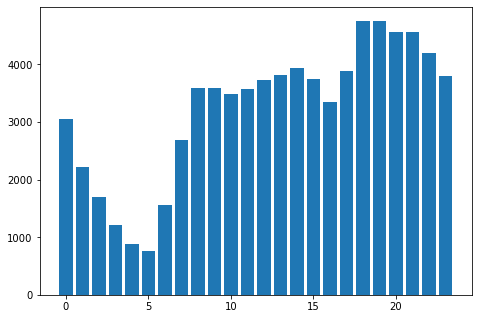

In [199]:
def most_popular_hour():
    temp = yellow_taxi.groupby('hour').count()
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    hour = range(24)
    rides = temp['distance']
    ax.bar(hour,rides)
    plt.show()
most_popular_hour()

In [ ]:
def average_dist_per_month():
    def hour_extract(x):
        return x[5:7]

In [216]:
def month_extract(x):
        return x[5:7]
temp1 = yellow_taxi
temp2 = uber
temp3 = pd.DataFrame()

In [217]:
temp1['month'] = temp1[['pickup_datetime']].apply(lambda x: int(month_extract(*x)), axis=1)
temp2['month'] = temp2[['pickup_datetime']].apply(lambda x: int(month_extract(*x)), axis=1)

In [218]:
temp1.groupby('month').mean()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,hour
month,,,,,,,,,
1,35754.762877,10.122157,-73.976136,40.751922,-73.974731,40.752174,1.670068,3.093812,13.551385
2,44997.498379,10.517785,-73.975987,40.751280,-73.975084,40.752397,1.701656,3.136235,13.798942
3,41386.326918,10.701995,-73.975616,40.751083,-73.974862,40.751717,1.670818,3.247938,13.699547
4,42618.616350,10.877338,-73.975615,40.751014,-73.974776,40.751439,1.673705,3.316333,13.551862
5,43672.114555,11.065205,-73.974841,40.751677,-73.974640,40.751471,1.696900,3.341369,13.541923
6,44909.302708,11.114604,-73.974622,40.750664,-73.974763,40.751415,1.687792,3.359704,13.401531
7,36584.798467,10.483833,-73.975869,40.750109,-73.974196,40.750695,1.679727,3.259538,13.432879
8,37737.256349,10.653100,-73.974517,40.750061,-73.974528,40.749898,1.680757,3.366372,13.508437
9,38962.690501,11.184270,-73.975103,40.750465,-73.974413,40.750825,1.705652,3.324291,13.534729


In [219]:
temp2.groupby('month').mean()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
month,,,,,,,,
1,2.754258e+07,10.660519,-73.975576,40.751082,-73.975111,40.751412,1.666358,3.139044
2,2.765870e+07,10.851895,-73.976313,40.751054,-73.975084,40.751328,1.680321,3.187771
3,2.761255e+07,11.017788,-73.975957,40.750807,-73.975160,40.751212,1.656514,3.228518
4,2.775034e+07,11.266606,-73.975569,40.751307,-73.974348,40.751344,1.667729,3.295871
5,2.773311e+07,11.592662,-73.975022,40.750633,-73.974297,40.751357,1.686385,3.423026
6,2.795136e+07,11.503660,-73.974868,40.750878,-73.974515,40.750978,1.683732,3.383365
7,2.777070e+07,11.085949,-73.975644,40.749696,-73.975076,40.750121,1.702256,3.354625
8,2.758359e+07,11.155588,-73.975655,40.749373,-73.974337,40.749770,1.709615,3.382306
9,2.752462e+07,11.681841,-73.975454,40.750337,-73.974790,40.750436,1.658816,3.354267
